> **Student Names and IDs**:
>
> - Newton Kwan, nk150 

# Homework 4

## Part 1: Nearest Neighbors

In [1]:
import numpy as np
from sklearn import neighbors

def risk(k, T, S):
    h = neighbors.KNeighborsClassifier(k) # Classifier implementing the k-nearest neighbors vote
    h.fit(T['x'], T['y']) # Fit the model using X as training data and y as target values
    y = h.predict(S['x']) # Predict the class labels for the provided data
    return 1 - np.sum(S['y'] == y) / len(S['y'])

### Problem 1.1

What loss does the `risk` function above use?

### Answer

The loss the risk function uses is the percentage of incorrect predictions. Incorrect predictions increase the risk while correct predictions decrease the risk for [0,1]. If the predictor predicts every item in $S$ correctly, the risk function will return 0. Conversely, if the predictor predicts every item in $S$ incorrectly, the risk function will return 1. Concretely, if there are 10 items in $S$, the predictor predicts 4 of them correctly, and 6 of them incorrectly, the risk function will return 0.6 -- the number of incorrect predictions. 

### Problem 1.2

What is the value of

    risk(1, T, T)
    
regardless of what training set $T$ is used, assuming that all data points $\mathbf{x}$ in $T$ are distinct? Justify your answer with brief and clear text that involves this last assumption.

### Answer

    risk(1, T, T) = 0

In this case, training set = testing set. If we train a predictor with training set $\textit{T}$ and then use that predictor to find the 1-nearest neighbor in our testing set (which equal to our training set $\textit{T}$), the predictor will look for the 1-nearest neighbor (which will always be the exact point used to train the predictor) and classify the testing set with 100% accuracy and return a risk of 0. 

### Problem 1.3

Would your answer to problem 1.2 change for the call

    risk(k, T, T)
    
with $k > 1$? Explain briefly and clearly.

### Answer

It is possible that the risk would not be 0 when $k >1$ because it is possible for a majority of the points nearest the the point in question to be labelled in the other classifier. A clear example may be when k = n, where n is the number of training examples. If our classifier has predictions squares and circles, where there were many more squares than circles in the training data, say 80 squares to 20 circles, the $k$ nearest neighbors when $k = n$ would return whichever label there was more of in the training set. 

### Problem 1.4

Let us now remove the assumption that all data points $\mathbf{x}$ in $T$ are distinct. Describe briefly and clearly what would have to happen for the value of

    risk(1, T, T)
    
to have a different value from what you gave in your answer to problem 1.2.

### Answer

Removing the assumption that all of the data points $\mathbf{x}$ in $\textit{T}$ are distinct, one way that we could get a different value from 

      risk(1, T, T)
      
is if the training data contained at least two $\mathbf{x}$'s that mapped to different outcomes. For example, if the training data you received had (5,4) mapping to $y$ = 'square' and somewhere else in the data had (5,4) mapping to $y$ = 'circle', then your classifier would pick whichever $y$ value it found first or randomly, depending on how the code was written. 

### Data

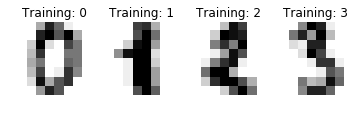

In [2]:
%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()
data = {'x': digits.images.reshape((len(digits.images), -1)), 'y': digits.target}

### Some Useful Code

In [3]:
from math import floor
def progress(p=0):
    try:
        progress.initialized = progress.initialized
    except AttributeError:
        progress.initialized = True
        progress.count, progress.last, progress.decade = 0, 0, 0
    if  p > 0:
        progress.count, progress.last, progress.decade = 0, p, 0
    else:
        progress.count += 1
        decade = floor(10 * progress.count / progress.last)
        if decade > progress.decade:
            progress.decade = decade
            print(10 * decade, '%', sep='', end=' ')
            if decade == 10:
                print()

In [4]:
def showRisk(kValues, mean, std):
    plt.figure()
    ax = plt.axes([0, 0, 1, 1])
    plt.errorbar(kValues, mean, yerr=std, fmt='-o', lw=2,
                 capsize=5, ecolor='orange')
    ax.set_xticks(kValues)
    plt.xlabel('k')
    plt.ylabel('Risk (Percent)')
    plt.show()

### Problem 1.5

Write code that repeats the following computation $30$ times: Split the `data` into a training set `T` that contains about 3/4 of the `data`, _selected at random_, and a test set `S` that contains the remaining `data`. For each split, compute the

    risk(k, T, S)
    
for all odd values of $k$ between $1$ and $21$ inclusive (we consider odd values only so we never have ties). Plot the risk values with error bars. The half-length of the bar for value $k$ is the standard deviation of the risk values over the 30 trials for that value of $k$.

Show your code and the resulting plot, with axes appropriately labeled (`showRisk` does this for you), and report the mean risk for $k=1$, as a percentage (not a fraction) and with two decimal digits after the period.

### Answer

In [5]:
# initialize a dictionary to hold a list of risks for each odd k value from 1-21 
risks = {} 
for k in range(1,22, 2):
    risks[str(k)] = []
    
data_length = len(data['x'])                      # 1797 total data points 

# perform the computation 30 times 
for i in range(0, 30):
    
    # zip the data and randomly shuffle it 
    zip_data = list(zip(data['x'], data['y']))
    np.random.shuffle(zip_data)
    
    # intialize training and test set dictionaries 
    T = {}
    T['x'] = []
    T['y'] = []
    S = {}
    S['x'] = []
    S['y'] = []
    
    for i in range(0, 1347):                      # data points from 1 - 1346 (roughly 3/4 of data)
        T['x'].append(zip_data[i][0])
        T['y'].append(zip_data[i][1]) 
    for i in range(1347, data_length):            # data points from 1347 - 1797 (roughly 1/4 of data)
        S['x'].append(zip_data[i][0])
        S['y'].append(zip_data[i][1])
    
    r = []                                        # initialize risk list for the ith iteration 
    for k in range(1,22, 2):
        risk_iter = risk(k, T, S)                 # calculate risk for k for ith iteration 
        r.append(risk_iter)                       # append the risk to the r list for current ith iteration 
        risks[str(k)].append(risk_iter)           # append risk to the appropriate list in the risks dictionary 


In [6]:
# Calculate means and standard deviations 
k_values = range(1, 22, 2)    # k values from 1 to 21 
std = []                      # initialize standard deviation list 
m = []                        # initialize means list 
for i in k_values:
    sd = np.std(risks[str(i)])
    mean = np.mean(risks[str(i)])
    std.append(sd)
    m.append(mean)

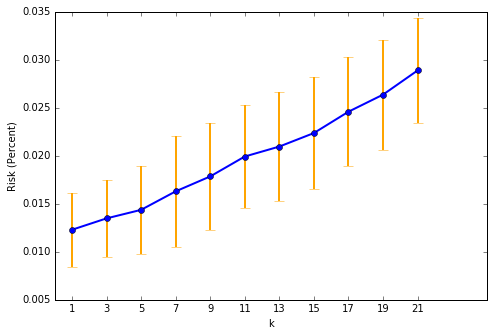

In [7]:
showRisk(k_values, m, std)

In [8]:
print("The mean risk for k = 1 is {:.3}0%".format(m[0]*100))

The mean risk for k = 1 is 1.230%


### Problem 1.6

Is a $1$-NN classifier likely to do better when most margins are positive or negative? Justify your answer briefly and clearly.

### Answer

A 1-NN classifier is likely to do better when most margins are positive because a positive margin means that there is a distinct point $\mathbf{x}$ with the same label that is closer to the point in question than a distinct point $\mathbf{x}$ with a different label. If most margins are positive, most of the points with the same labels will be closer together and there is likely clustering with nice structure that is more likely to predict more accurately for future data. 

### Problem 1.7

Write code to compute a 100-bin histogram of the margin $\mu(\mathbf{x})$ of the data in `data`. Show your code and the resulting plot. Your histogram should have properly labeled axes. The values in the histogram should add up to the number of data points, not to $1$. Also report the percentage (not fraction) of points with a negative margin. Display three decimal digits after the period.

### Answer

In [9]:
import math
from scipy.spatial import distance

In [10]:
margin = [] # initialize margin list 

progress(len(data['x']))
# loop over all data points in data 
for i in range(0, len(data['x'])):
    progress(len(data['x']))
    d_d = math.inf                # initialize the distance to different to infinity 
    d_s = math.inf                # initialize the distance to same to infinity 
    for j in range(0, len(data['x'])):
        if i != j: 
            eucl_dist = distance.euclidean(data['x'][i], data['x'][j]) # compute the euclidean distance between data point i and j 
            if data['y'][i] != data['y'][j] and eucl_dist < d_d:       # different y values 
                d_d = eucl_dist 
            if data['y'][i] == data['y'][j] and eucl_dist < d_s:       # same y values and closer to each other 
                d_s = eucl_dist 
    mu = d_d - d_s 
    margin.append(mu)

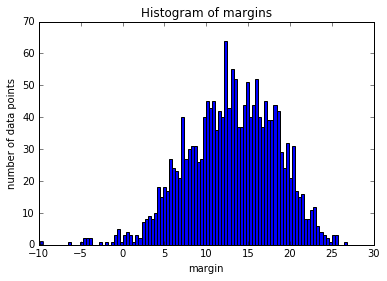

In [11]:
m_min = min(margin) # find the minimum of the margin 
m_max = max(margin) # find the maximum of the margin 
x_axis = np.linspace(m_min, m_max, 100) # split the maximum margin - minimum margin into 100 bins 

plt.hist(margin, bins=100)
#print(sum(hist[0]))
plt.xlabel("margin")
plt.ylabel("number of data points")
plt.title("Histogram of margins")

In [12]:
negatives = 0 
for i in range(0, len(margin)):
    if margin[i] < 0:
        negatives += 1

In [13]:
neg_margin_pct = (negatives / len(margin))*100
print("The percentage of points with a negative margin is {:.4}%".format(neg_margin_pct))

The percentage of points with a negative margin is 1.169%


## Part 2: Differentiation

/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


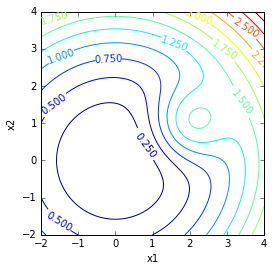

(100, 100, 2)


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def showContours(X, Y):
    fig, ax = plt.subplots()
    cs = ax.contour(X[:, :, 0], X[:, :, 1], Y, 12)
    ax.clabel(cs, inline=1, fontsize=10)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('image')
    plt.show()

n, mn, mx = 100, -2, 4
x = np.linspace(mn, mx, n)
X = np.dstack(np.meshgrid(x, x))

def inner(x, y):
    return x[:, :, 0] ** 2 + y[:, :, 1] ** 2

c, scale = [2, 1], 10

def f(x):
    d = np.zeros(x.shape)
    for i in range(2):
        d[:, :, i] = x[:, :, i] - c[i]
    y = inner(x, x) / scale + np.exp(-inner(d, d))
    return y

Y = f(X)
showContours(X, Y)
print(X.shape)

### Problem 2.1

Write mathematical formulas for the gradient $\nabla f(\mathbf{x})$ and the Hessian $H_f(\mathbf{x})$ of $f$. If you are not sure of your result, show your calculations.

### Answer

##### Writing out the function explicitly

$$f(\mathbf{x}) = \frac{x_{1}^{2} + x_{2}^{2}}{10} + e^{-(\mathbf{x}-\mathbf{c})^{T}(\mathbf{x} - \mathbf{c})} = 
\frac{x_{1}^{2} + x_{2}^{2}}{10} + e^{-[(x_1 - 2)^{2} + (x_2-1)^{2}]}
$$

##### Gradient 
$$
\nabla f(\mathbf{x})=
\left[\begin{array}{c}
\frac{\partial f}{\partial x_1}\\
\vdots\\
\frac{\partial f}{\partial x_n}\\
\end{array}\right]
$$

where $f(\mathbf{x})$ is n dimensions and the gradient of $f(\mathbf{x})$ is an n-dimensional vector

$$
\nabla f(\mathbf{x})=
\left[\begin{array}{c}
\frac{\partial f}{\partial x_1}\\
\frac{\partial f}{\partial x_2}\\
\end{array}\right] =
\left[\begin{array}{c}
\frac{x_1}{5} - 2(x_1 - 2)e^{-[(x_1 - 2)^{2} + (x_2-1)^{2}]}\\
\frac{x_2}{5} - 2(x_2 - 1)e^{-[(x_1 - 2)^{2} + (x_2-1)^{2}]}\\
\end{array}\right]
$$
##### Hessian

$$
H(\mathbf{x})=
\left[\begin{array}{ccc}
\frac{\partial^2 f}{\partial x_{1}^2} & \cdots & \frac{\partial^2 f}{\partial x_{1} \partial x_{m}}\\
\vdots & & \vdots\\
\frac{\partial^2 f}{\partial x_{m} \partial x_{1}} & \cdots & \frac{\partial^2 f}{\partial x_{m}^2}\\
\end{array}\right]
$$

where $\mathbf{z} \in \mathbb{R^{m}}$ 

$$
H(\mathbf{x})=
\left[\begin{array}{ccc}
\frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_{1} \partial x_{2}}\\
\frac{\partial^2 f}{\partial x_{2} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2}\\
\end{array}\right] = 
\left[\begin{array}{ccc}
\frac{1}{5} - 2e^{-[(x_{1}-2)^{2}+(x_{2}-1)^{2}]} (1 - 2(x_{1}-2)^{2}) & 4e^{-[(x_{1}-2)^{2}+(x_{2}-1)^{2}]}(x_{1}-2)(x_{2}-1)\\
4e^{-[(x_{1}-2)^{2}+(x_{2}-1)^{2}]}(x_{1}-2)(x_{2}-1) & \frac{1}{5} - 2e^{-[(x_{1}-2)^{2}+(x_{2}-1)^{2}]} (1 - 2(x_{2}-1)^{2}) \\
\end{array}\right] 
$$

### Problem 2.2

Use your formulas to write code that draws a labeled contour plots of the norm of the gradient of $f$ on a grid of $100\times 100$ equi-spaced samples in the square $-2 \leq x_1, x_2 \leq 4$. Show your code and the resulting plot.

### Answer

/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


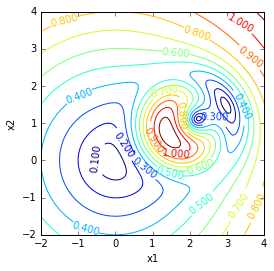

In [15]:
def grad_f(x):
    d = np.zeros(x.shape)
    for i in range(2):
        d[:, :, i] = x[:, :, i] - c[i]
    y_1 = x[:, :, 0] / 5 - 2*(x[:, :, 0] - c[0])* np.exp(-inner(d, d))
    y_2 = x[:, :, 1] / 5 - 2*(x[:, :, 1] - c[1])* np.exp(-inner(d, d))
    y = np.sqrt(np.square(y_1) + np.square(y_2))
    return y

Y = grad_f(X)
showContours(X, Y)

### Problem 2.3

Use your formulas to write code that draws an image whose color depends on the signs of the eigenvalues of $H_f(\mathbf{x})$ on a grid of $100\times 100$ equi-spaced samples in the square $-2 \leq x_1, x_2 \leq 4$. Show your code and the resulting plot.

In [16]:
def showLambdas(Lambda):
    L0 = Lambda[:, :, 0] > 0
    L1 = Lambda[:, :, 1] > 0
    sign = 0.5 * np.ones(Lambda.shape[:2])
    sign[L0 & L1] = 1
    sign[(~L0) & (~L1)] = 0
    
    fig, ax = plt.subplots()
    ax.imshow(sign, origin='lower')
    plt.axis('off')
    plt.show()
    print('Mapping from colors to signs of the eigenvalues:')
    print('Yellow: both positive; Green: mixed; Black: both negative')


### Answer

In [17]:
def H(x):
    '''
    Returns the Hessian of x. This really returns a 2x2 matrix with each entry being a 100x100 matrix. We find the Hessian of each 
    (x1, x2) pair by creating a 2x2 matrix from real number elements and we find the eigenvalues of this Hessian. 
    '''
    d = np.zeros(x.shape)
    x1 = x[:,:,0]
    x2 = x[:,:,1]
    for i in range(2):
        d[:, :, i] = x[:, :, i] - c[i]
    y11 = (1/5) - 2*np.exp(-inner(d,d))*(1-2*(x1 -2)**2)
    y12 = 4*np.exp(-inner(d,d))*(x1-2)*(x2-1)
    y21 = 4*np.exp(-inner(d,d))*(x1-2)*(x2-1)
    y22 = (1/5) - 2*np.exp(-inner(d,d))*(1-2*(x2 -1)**2)
    
    lmbda = np.zeros(x.shape)
    for i in range(0, 100):
        for j in range(0, 100):
            h = np.array([[y11[i][j], y12[i][j]], [y21[i][j], y22[i][j]]])
            ev = np.linalg.eigvals(h)
            lmbda[i, j, :] = ev
    return lmbda


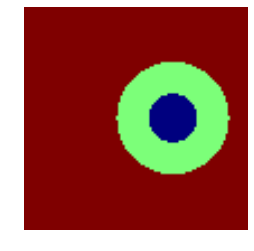

Mapping from colors to signs of the eigenvalues:
Yellow: both positive; Green: mixed; Black: both negative


In [18]:
lmbda = H(X)
showLambdas(lmbda)

### Problem 2.4

How many stationary points, and of what types (maximum, minimum, saddle) does $f$ plausibly have in the region of the plot? Justify your answer.

### Answer

There are there stationary points: one maximum, one minimum, and one saddle. In the contour plot, notice that there is a minimum, maximum, and saddle point in the regions corresponding to the graph of the Hessian. Thus, it is plausible that $\text{f}$ has these stationary points in the regions corresponding to the different colors and that there are three of them because there are three regions with distinct colors. 